# Predicting heart disease using machine learning

### Based on ML course of ztm

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes.

were going to take the following approach:
1. Problem definition
2. Data
3. Evaluation
4. Features 
5. Modelling
6. Experimentation

In [62]:
# Import all the tools we need

# Regular EDA(exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# we want our plots to appear inside the notebook
%matplotlib inline

# Models from scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

## Load data

In [63]:
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [64]:
heart_disease.shape

(303, 14)

In [65]:
heart_disease.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [66]:
heart_disease.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

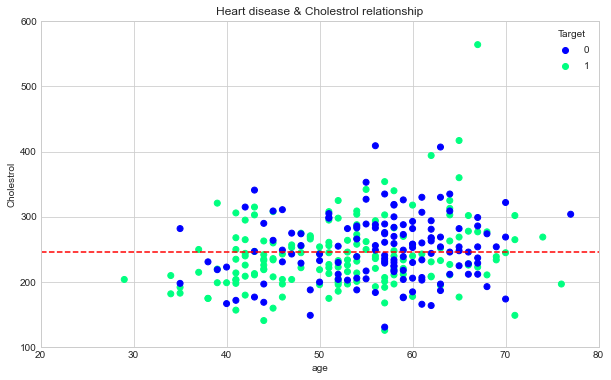

In [67]:
plt.style.use("seaborn-whitegrid")

fig, ax= plt.subplots(figsize=(10,6))
ax.set_xlim([20,80])
ax.set_ylim([100,600])
scatter = ax.scatter(heart_disease["age"],
                     heart_disease["chol"],
                     c=heart_disease["target"],
                     cmap="winter")

ax.set(title="Heart disease & Cholestrol relationship", 
       xlabel="age",
       ylabel="Cholestrol")

ax.legend(*scatter.legend_elements(),title="Target")

ax.axhline(heart_disease["chol"].mean(),
           linestyle="--",
           c="red")

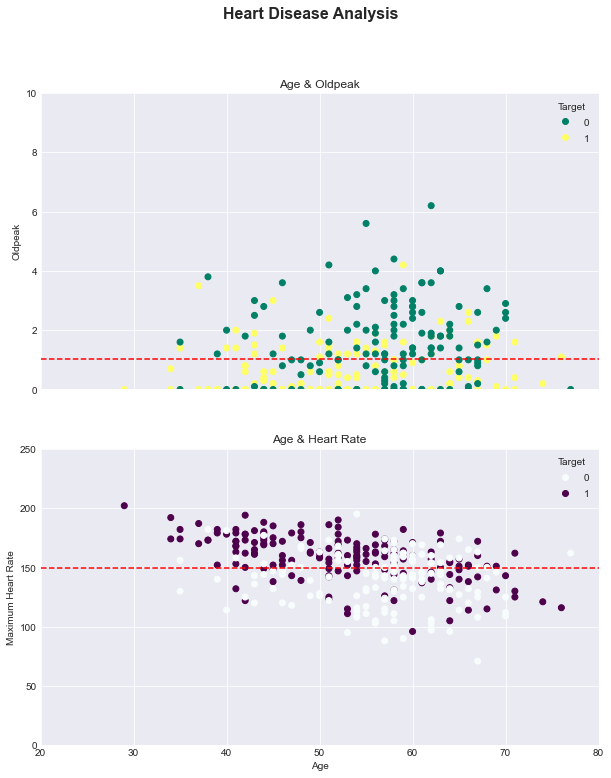

In [68]:
# Plotting the ralationship of age & oldpeak & thalach(maximum heart rate achieved)

plt.style.use("seaborn-darkgrid")
fig, (ax0,ax1) = plt.subplots(figsize=(10,12),nrows=2, ncols=1, sharex=True)

fig.suptitle('Heart Disease Analysis', fontsize=16, fontweight='bold');
ax0.set_xlim([20,80])
ax0.set_ylim([0,10])

scatter = ax0.scatter(heart_disease["age"],
                      heart_disease["oldpeak"],
                      c= heart_disease["target"],
                      cmap= "summer")
ax0.set(
        ylabel="Oldpeak",
        title= "Age & Oldpeak")

ax0.axhline(y= heart_disease["oldpeak"].mean(),
            color="r",
            linestyle="--",
            label="Average")
ax0.legend(*scatter.legend_elements(), title="Target");

# Second plot thalach

scatter2= ax1.scatter(heart_disease["age"],
                      heart_disease["thalach"],
                      c=heart_disease["target"],
                      cmap="BuPu")

ax1.set_ylim([0,250])
ax1.set(xlabel="Age",
        ylabel="Maximum Heart Rate",
        title="Age & Heart Rate")

ax1.axhline(y=heart_disease["thalach"].mean(),
            color="r",
            linestyle="--",
)
ax1.legend(*scatter2.legend_elements(), title="Target");

In [69]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

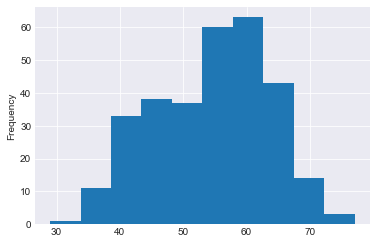

In [70]:
# plt.style.use("seaborn-colorblind")
heart_disease.age.plot.hist();

In [71]:
heart_disease.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


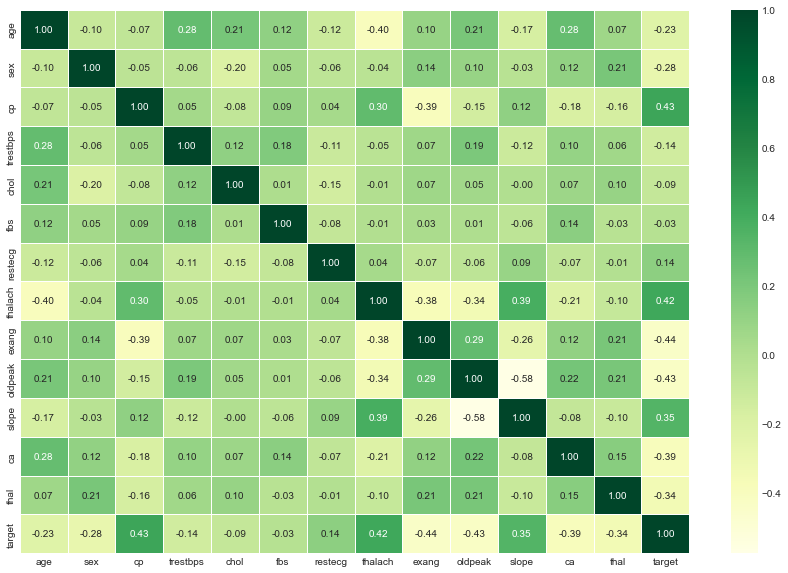

In [72]:
corr_matrix= heart_disease.corr()
fig, ax= plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                 linewidths=0.5,
                 annot=True,
                 cmap="YlGn",
                 fmt=".2f")

bottom, top = ax.get_ylim()
# ax.set_ylim(bottom+0.5, top- 0.5)

## Modelling

In [73]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [74]:
X = heart_disease.drop("target", axis =1)
y = heart_disease["target"]

In [75]:
# Split data into train and test sets
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X,y , test_size=0.2)



We are going to try 3 different machine learning models:

1. Logistic Regression
2. K-Nearest Neighbours Classifier
3. Random Forest Classifier


In [76]:
# Putting models into dictionary
models= {"Logistic Regression": LogisticRegression(),
         "KNN": KNeighborsClassifier(),
         "Random Forest": RandomForestClassifier()}

def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    FIts and evaluates given machine learning models.
    models : dict of different scikit-learn machine learning models
    """
    np.random.seed(42)
    
    model_score ={}
    
    for name, model in models.items():
        model.fit(X_train,y_train)
        model_score[name] = model.score(X_test,y_test)
        
    return model_score

In [77]:
model_scores = fit_and_score(models= models,
                             X_train=X_train,
                             y_train=y_train,
                             X_test = X_test,
                             y_test= y_test)
model_scores

E:\DATA SCIENCE PROJECTS\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

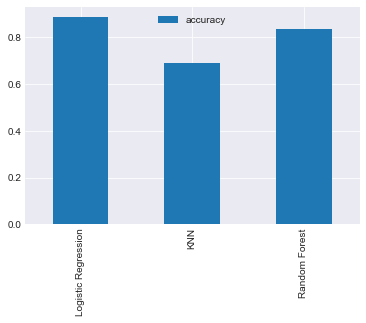

In [78]:
model_comparison = pd.DataFrame(model_scores, index=["accuracy"])
model_comparison.T.plot.bar();

In [79]:
train_scores = []
test_scores= []

neigbors= range(1,21)
knn = KNeighborsClassifier()

for i in range (1,21):
    knn.set_params(n_neighbors=i)
    
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    
    test_scores.append(knn.score(X_test,y_test))

In [80]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [81]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on the test data: 0.7540983606557377 %


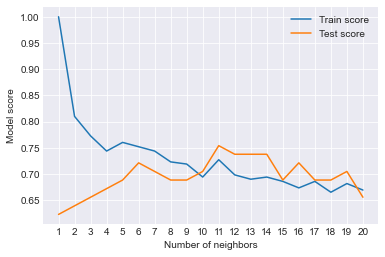

In [82]:
plt.plot(neigbors, train_scores, label="Train score")
plt.plot(neigbors, test_scores, label= "Test score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)} %")

In [83]:
log_reg_grid = {"C": np.linspace(-4,4,20),
                "solver": ["liblinear"]}

rf_grid = {"n_estimators": np.arange(10,1000,50),
           "max_depth": [None, 3,5,10],
           "min_samples_split":np.arange(2,20,2),
           "min_samples_leaf": np.arange(1,20,2)}



In [84]:
np.random.seed(42)

rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                n_iter= 20,
                                cv=5,
                                verbose=True)
rs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


E:\DATA SCIENCE PROJECTS\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
50 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "E:\DATA SCIENCE PROJECTS\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\DATA SCIENCE PROJECTS\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py", line 1464, in fit
    raise ValueError("Penalty term must be positive; got (C=%r)" % self.C)
ValueError: Penalty term must be positive; got (C=-4

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([-4.        , -3.57894737, -3.15789474, -2.73684211, -2.31578947,
       -1.89473684, -1.47368421, -1.05263158, -0.63157895, -0.21052632,
        0.21052632,  0.63157895,  1.05263158,  1.47368421,  1.89473684,
        2.31578947,  2.73684211,  3.15789474,  3.57894737,  4.        ]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [85]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.21052631578947345}

In [86]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

In [87]:
np.random.seed(42)

rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=36,
                           verbose=True)
rs_rf.fit(X_train,y_train)


Fitting 5 folds for each of 36 candidates, totalling 180 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=36,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [88]:
rs_rf.best_params_

{'n_estimators': 260,
 'min_samples_split': 16,
 'min_samples_leaf': 17,
 'max_depth': 3}

In [89]:
rs_rf.score(X_test, y_test)

0.8688524590163934

## Hyperparamter Tuning with GridSearchCV

In [90]:
log_reg_grid= {"C":np.linspace(-4,4,30),
               "solver": ["liblinear"]}

gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)
gs_log_reg.fit(X_train,y_train)


Fitting 5 folds for each of 30 candidates, totalling 150 fits


E:\DATA SCIENCE PROJECTS\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
75 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "E:\DATA SCIENCE PROJECTS\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\DATA SCIENCE PROJECTS\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py", line 1464, in fit
    raise ValueError("Penalty term must be positive; got (C=%r)" % self.C)
ValueError: Penalty term must be positive; got (C=-4

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([-4.        , -3.72413793, -3.44827586, -3.17241379, -2.89655172,
       -2.62068966, -2.34482759, -2.06896552, -1.79310345, -1.51724138,
       -1.24137931, -0.96551724, -0.68965517, -0.4137931 , -0.13793103,
        0.13793103,  0.4137931 ,  0.68965517,  0.96551724,  1.24137931,
        1.51724138,  1.79310345,  2.06896552,  2.34482759,  2.62068966,
        2.89655172,  3.17241379,  3.44827586,  3.72413793,  4.        ]),
                         'solver': ['liblinear']},
             verbose=True)

In [91]:
gs_log_reg.best_params_

{'C': 0.9655172413793105, 'solver': 'liblinear'}

In [92]:
gs_log_reg.score(X_test, y_test)

0.8688524590163934

## Evaluating our tuned machine learning classifier

* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score

In [93]:
y_preds = gs_log_reg.predict(X_test)

In [94]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

E:\DATA SCIENCE PROJECTS\heart-disease-project\env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


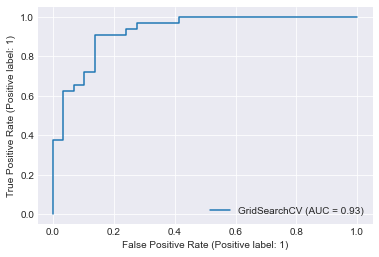

In [96]:
plot_roc_curve(gs_log_reg, X_test, y_test);

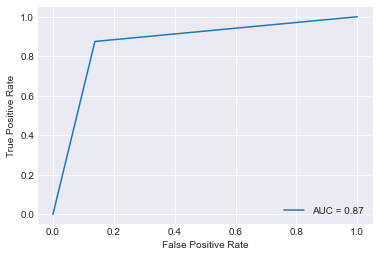

In [100]:
from sklearn import metrics
fpr, tpr, threshhold= metrics.roc_curve(y_test, y_preds)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr,roc_auc=roc_auc,
                                  estimator_name=None)

display.plot()
plt.show()

In [101]:
# Confusion matrix
print(confusion_matrix(y_test,y_preds))

[[25  4]
 [ 4 28]]
